# Homework for statistics module

Rules for code style:
* All the code in this notebook
* Imports are provided in the head of the notebook
* All the cells could be ran in the right order from the top to the bottom
* Commentaries are required
* All the plots should have: title, axis labels and summaries (if necessary)
* Main summaries are provided in cells using markdown **(your analysis of the results and data is very important!!!)**
* Try to use functions and classes to reduce duplicated code blocks to minimum

Also you can use $\LaTeX$ to write formulas. F.e. $\bar{y} = \frac{1}{n}\sum_{i=1}^n \hat{x}_i$ or on a new line:
$$
    \bar{y} = \frac{1}{n}\sum_{i=1}^n \hat{x}_i
$$
To do so, you can write anything between $\$ \quad \$$ (или $ \$\$ \quad\$\$ $).

### Criteria (50 points total):
* Task 1 (17 points)

    * Requested formulas are provided - 4 points
    * All necessary experiments are done - 6 points
    * Results are analysed with commentaries - 7 points
* Tasks 2.1 и 2.2 (16 points)

    * Visualization and/or simple exploratory data analysis are implemented - 2 points
    * Hypotheses are tested - 2 points
    * Results are analysed with commentaries - 4 points
* Task 3 (13 points)

    * Visualization and/or simple exploratory data analysis are implemented - 2 points
    * Hypotheses are tested - 4 points
    * Data was aggregated properly - 2 points
    * Results are analysed with commentaries - 5 points
* Extra points:

    * 4 points in case clear, "pythonic" and understandable code style.

Good work: 40+ points.

In [ ]:
!pip install bds_courseware 

from bds_courseware import read_drive_dataset
from bds_courseware import HOMEWORK_DATASETS

import pandas as pd
import numpy as np
import scipy.stats as st
import math

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
plt.style.use('bmh')

from pylab import rcParams

# plots in svg look more precise
%config InlineBackend.figure_format = 'svg'

# Task 1

## Stratification

The example:

Let's assume, we need to estimate a mean votes count for every election candidate. Suppose there are 3 cities in a country: 1 million factory workers live in city A, 2 million office workers live in city B, and 3 million senior citizens live in city B. We can choose a random sample of 60 votes from the entire population, but there is some chance that the random sample will be poorly balanced between these cities and, therefore, will be biased and of little use ("average temperature in the hospital"), causing a significant error in the estimation. Instead, if we choose to use a simple random sample of 10, 20 and 30 votes from cities A, B and C, respectively, we can get a smaller error in the estimate with the same total sample size. This technique is called stratification.


### The task

Suppose the population is a mixture of 3 normally distributed CBs. In other words, the population can be divided into 3 strata.
$$
    F(X) = a_1 F(X_1) + a_2 F(X_2) + a_3 F(X_3)
$$

**Goals:**  

1. Derive (for example, in the block below, using Markdown) the formulas for point estimates of the mathematical expectation and variance for the average value of subsamples formed in different ways:
- random selection from the entire population;
- random selection of strata in proportion to shares;
- random selection according to the optimal sub-sampling.

2. Calculate point estimates of the mathematical expectation and variance of the mean value for each data sampling method from p.1, provided:
* Experiments should be conducted for 3 cases (for every method from p.1 each):
     * all strata have the same mat. expectations and variance;
     * strata have different mat. expectations, but the same variance;
     * strata have different mat. expectations and variance.
* For each sampling method plot histogram of General Population data (using matplotlib or seaborn packages);
* Plot boxplots for sample mean estimated using each sampling method on a single figure to compare the results. Repeat for each experiment.
* You are provided with `GeneralPopulation` class. It already has all necessary methods for sampling and creating general population as a mixture of strata.
* Your goal is to write functions to conduct experiments and visualize the results.
* Also provide commentaries as summaries and analysis of results after each visualization.



## Solution for Task 1

### Formulas:

$x_1, x_2, ..., x_N$ - general population (GP) with volume $N$.

Methematical expectation (ME) for GP:

$$
\mu = \frac{1}{N} \sum_{i=1}^N x_i
$$

We assume that objects are sampled from GP randomly <b>with replacement</b>

$(X_1, X_2, ..., X_n)$ - sample from GP.

$n$ - sample volume.

Pointwise <b>ME estimation</b> for GP is sample mean:

$$
\bar{X} = \frac{1}{n} \sum_{i=1}^n X_i
$$

ME for $\bar{X}$:

$$
E\bar{X} = \frac{1}{n} \sum_{i=1}^n EX_i = \mu
$$

Dispersion for $\bar{X}$:

$$
Var(\bar{X}) = \frac{1}{n^2} \sum_{i=1}^n \sum_{j=1}^n Cov(X_i, X_j)
$$

Since objects are sampled with replacement, $Cov(X_i, X_j) = 0, i \ne j$. So:

$$
Var(\bar{X}) = \frac{1}{n^2} \sum_{i=1}^n Var(X_i) = \frac{\sigma^2}{n}
$$

#### Stratified sample point estimations:

Sample of volume $n_k$ is derived from strata $k$:

$(X_{1k}, X_{2k}, ..., X_{n_k k}), k = \bar{1,L}$

Then sample mean for $k$-th strata:

$$
\bar{X_k} = \frac{1}{n_k} \sum_{i=1}^{n_k} X_{ik}
$$

ME for a mixture of all strata:

$$
\mu = \sum_{k=1}^L W_k \mu_k \Rightarrow \bar{X_S} = \sum_{k=1}^L W_k \bar{X_k}
$$

$W_k$ - ratio of $k$-th strata.

ME for $\bar{X_S}$:

$$
E\bar{X_S} = \sum_{k=1}^L W_k E\bar{X_k} = \sum_{k=1}^L W_k \mu_k
$$

Dispersion for $\bar{X_S}$:

$$
D(\bar{X_S}) = \sum_{k=1}^L {W_k}^2 D (\bar{X_k}) = \sum_{k=1}^L {W_k}^2 \frac{{\sigma_k}^2}{n_k}
$$

#### Sample volumes if they are sampled proportionally:

$$
n_k = n W_k, k = \bar{1,L}, n = n_1 + n_2 + ... + n_L
$$

#### Sample volumes if they are optimal sampled (Neyman's method):

$$
n_k = \tilde{n_k} = n \frac{W_k \sigma_k}{\sum_{k=1}^L W_k \sigma_k} , k = \bar{1,L}, n = n_1 + n_2 + ... + n_L
$$

In [ ]:
class GeneralPopulation:

  def __init__(self, 
               means: [float], 
               stds: [float], 
               sizes: [int], 
               random_state: int = 15
               ):
    """
    Initializes our General Population and saves the given distributions
    
    :param means: List of expectations for normal distributions
    :param stds: List of standard deviations for normal distributions
    :param sizes: How many objects will be in each strata
    :param random_state: Parameter fixing randomness. Needed so that when conducting
    experiment repeatedly with the same input parameters, the results remained the same
    """
    self.strats = [st.norm(mean, std) for mean, std in zip(means, stds)]
    self._sample(sizes)
    self.random_state = random_state

  def _sample(self, sizes):
        """Creates a general population sample as a mixture of strata
        
        :param sizes: List with sample sizes of the corresponding normal distributions
        """
        self.strats_samples = [rv.rvs(size) for rv, size in zip(self.strats, sizes)]
        self.general_samples = np.hstack(self.strats_samples)
        self.N = self.general_samples.shape[0]
        
        # number of strata
        self.count_strats = len(sizes)
        
        # ratios for every strata in GP
        self.ws = [size/self.N for size in sizes]
        
        # ME and Std for GP
        self.m = np.mean(self.general_samples)
        self.sigma = np.std(self.general_samples)
        
        # ME and std for all strata
        self.ms = [np.mean(strat_sample) for strat_sample in self.strats_samples]
        self.sigmas = [np.std(strat_sample) for strat_sample in self.strats_samples]

  def random_subsampling(self, size):
      """Creates a random subset of the entire population
      
      :param sizes: subsample size
      """
      rc = np.random.choice(self.general_samples, size=size) 
      return rc
      
  def proportional_subsampling(self, size):
      """Creates a subsample with the number of elements, proportional shares of strata
      
      :param sizes: subsample size
      """
      self.strats_size_proport = [int(np.floor(size*w)) for w in self.ws]
      
      rc = []
      for k in range(len(self.strats_size_proport)):
          rc.append(np.random.choice(self.strats_samples[k],
                                      size=self.strats_size_proport[k]))
      
      return rc
      
  def optimal_subsampling(self, size):
      """Creates a subsample with the optimal number of elements relative to strata
      
      :param sizes: subsample size
      """
      sum_denom = 0
      for k in range(self.count_strats):
          sum_denom += self.ws[k] * self.sigmas[k]
      
      self.strats_size_optimal = [int(np.floor((size*w*sigma)/sum_denom)) for w, sigma in zip(self.ws, self.sigmas)]
      if 0 in self.strats_size_optimal:
          raise ValueError('Strats size is 0, please change variance of smallest strat!')
      
      rc = []
      for k in range(len(self.strats_size_optimal)):
          rc.append(np.random.choice(self.strats_samples[k],
                                      size=self.strats_size_optimal[k]))
      
      return rc   

  def run_experiments(self, n_sub, subsampling_method, n_experiments=1000):
      """Conducts a series of experiments and saves the results
      
      :param subsampling_method: method for creating a subsample
      :param n_experiments: number of experiment starts
      """
      means_s = []
      
      if(len(self.general_samples)<100):
          n_sub = 20
      
      if(subsampling_method == 'random_subsampling'):
          for n in range(n_experiments):
              rc = self.random_subsampling(n_sub)
              
              mean = rc.sum()/len(rc)
              means_s.append(mean)
              
      else:
          for n in range(n_experiments):
              if(subsampling_method == 'proportional_subsampling'):
                  rc = self.proportional_subsampling(n_sub)
              elif(subsampling_method == 'optimal_subsampling'):
                  rc = self.optimal_subsampling(n_sub)
              
              strats_mean = []
      
              for k in range(len(rc)):
                  strats_mean.append(sum(rc[k])/len(rc[k]))
      
              # Mean for a mixture
              means_s.append(sum([w_k*mean_k for w_k, mean_k in zip(self.ws, strats_mean)]))
              
      return means_s

Function for histogram plot:

In [ ]:
def plot_gp_density(general_population: GeneralPopulation, bins: int = 15, title_postfix: str = ''):
  rcParams['figure.figsize'] = 5, 3
  plt.hist(general_population.general_samples, bins=bins)
  title = f'Density for {title_postfix} GP'
  plt.title(title)
  plt.show()

Function for plotting Boxplots for sample mean:

In [ ]:
def plot_boxplots(general_population: GeneralPopulation, n_sub: int):
  means_random = general_population.run_experiments(n_sub, 'random_subsampling')
  means_proport = general_population.run_experiments(n_sub, 'proportional_subsampling')
  means_optimal = general_population.run_experiments(n_sub, 'optimal_subsampling')

  means_lists = pd.DataFrame(
    {'1 random subsampling': means_random,
      '2 proportional subsampling': means_proport,
      '3 optimal subsampling': means_optimal
    })

  rcParams['figure.figsize'] = 7, 6
  sns.boxplot(data=means_lists, width=0.3)
  plt.title('Sample mean distributions for 3 sampling methods')
  plt.show()

**Parameters for each General Population**  
You can use these or specify your own parameters for strata:

In [ ]:
SIZES = (150, 150, 150)
N_SUBSAMPLE = 150
EQUAL_MEAN_EQUAL_STDS_ARGS = {'means': [0, 0, 0], 'stds': [3, 3, 3], 'sizes': SIZES}
DIFFERENT_MEAN_EQUAL_STDS_ARGS = {'means': [15, -1, -17], 'stds': [3, 3, 3], 'sizes':SIZES}
EQUAL_MEAN_DIFFERENT_STDS_ARGS = {'means': [0, 0, 0], 'stds': [3, 7, 11], 'sizes':SIZES}

**Initialization**

In [ ]:
emes_population = GeneralPopulation(**EQUAL_MEAN_EQUAL_STDS_ARGS)
dmes_population = GeneralPopulation(**DIFFERENT_MEAN_EQUAL_STDS_ARGS)
emds_population = GeneralPopulation(**EQUAL_MEAN_DIFFERENT_STDS_ARGS)

**General population with EQUAL means and EQUAL STDs of strata**  
Distribution histogram:

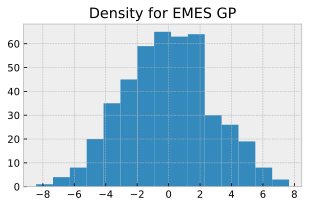

In [ ]:
plot_gp_density(emes_population, title_postfix='EMES')

Boxplots for sample mean:

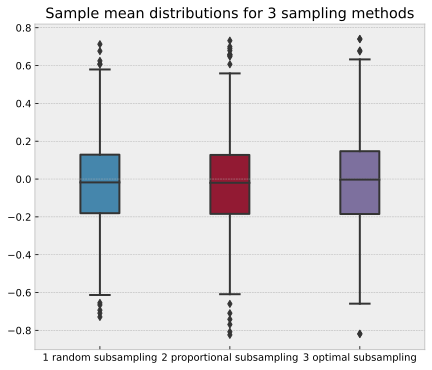

In [ ]:
plot_boxplots(emes_population, N_SUBSAMPLE)

**General population with DIFFERENT means and EQUAL STDs of strata**  
Distribution histogram:

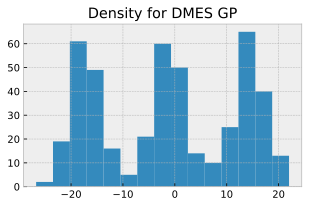

In [ ]:
plot_gp_density(dmes_population, title_postfix='DMES')

Boxplots for sample mean:

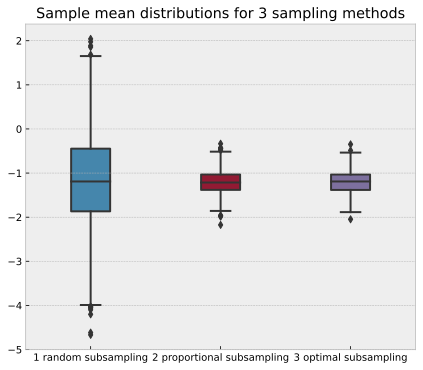

In [ ]:
plot_boxplots(dmes_population, N_SUBSAMPLE)

**General population with DIFFERENT means and DIFFERENT STDs of strata**  
Distribution histogram:

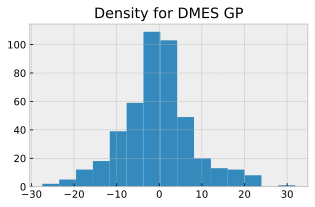

In [ ]:
plot_gp_density(emds_population, title_postfix='DMES')

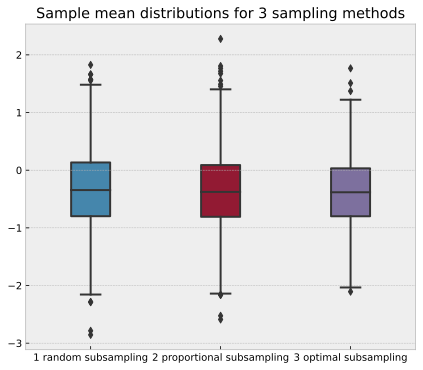

In [ ]:
plot_boxplots(emds_population, N_SUBSAMPLE)

Boxplots for sample mean:

With the experiments conducted and statistics estimated we can generate these <b>conclusions</b>: 

* Sample volume estimation based on proportional sampling method allows to noticeably reduce mean Dispersion for every strata, provided ME for each strata are different and Dispersion within a strata is lower than Dispertion between all strata; 

* Providing all strata have different ME and Dispersion, optimal sampling shows slightly better results than proportional sampling method. But during the experiments statistical difference between them was not proved. 

* Experimental point estimations are very close to Theoretical estimations. But Empirical Dispersion for sample mean is much larger than Theoretical estimation when ME for strata are different.

# Task 2



### Part 1
Using [this criteria](https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/how-to/correlation/interpret-the-results/#:~:text=For%20the%20Pearson%20correlation%2C%20an,linear%20relationship%20between%20the%20variables.&text=If%20both%20variables%20tend%20to,represents%20the%20correlation%20slopes%20upward.), check whether there is a correlation between a brain size and intelligence for a dataset consisted both of men and women objects. Also check it for men and women subsamples separately.

**Data is in `HW1_task2_brain_data.tsv`**

### Part 2
Using $Chi^2$ criteria check whether there is a statistical difference between men's and women's choice of auto.  (Features `Sex` и `PreferCar`)

**Data is in `HW1_task2_car_prefs_data.tsv`**

## Solution for Task 2.1:

In [ ]:
import sys
sys.path

['',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython']

In [ ]:
df = pd.read_csv('data/HW1_task2_brain_data.tsv', sep='\t')
df.head()

#### Feature description:
Description for the dataset: https://www3.nd.edu/~busiforc/handouts/Data%20and%20Stories/correlation/Brain%20Size/brainsize.html

1.Gender: Male or Female

2.FSIQ: Full Scale IQ scores based on the four Wechsler (1981) subtests

3.VIQ: Verbal IQ scores based on the four Wechsler (1981) subtests

4.PIQ: Performance IQ scores based on the four Wechsler (1981) subtests

5.Weight: body weight in pounds

6.Height: height in inches

7.MRI_Count: total pixel Count from the 18 MRI scans

In [ ]:
df.info()

There are non-numerical values for features Weight and Height, so these have object type. But for our research they are out of interest.

#### We should analyse correlation between brain size and intelligence

Brain size is presented by pixel number on MRI: <b>MRI_Count</b>

Intelligence can be estimated basing on these features: <b>FSIQ</b>, <b>VIQ</b> и <b>PIQ</b>

#### Separated samples for males and females:

In [ ]:
df_male = df[df.Gender == 'Male'].reset_index(drop=True)
df_male.shape

In [ ]:
df_male.head()

In [ ]:
df_female = df[df.Gender == 'Female'].reset_index(drop=True)
df_female.shape

In [ ]:
df_female.head()

### Analysis with plots:

##### Plots for original, non-separated by sex data:

In [ ]:
iqs = ['FSIQ', 'VIQ', 'PIQ']
yticks = list(range(60,170,10))

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for ax, iq in zip(axes, iqs):
    ax.scatter(df['MRI_Count'], df[iq])
    ax.set_title('MRI_Count vs ' + iq)
    ax.set_xlabel('MRI_Count')
    ax.set_ylabel(iq)
    ax.set_yticks(yticks)

plt.show()

##### Plots only for males:

In [ ]:
iqs = ['FSIQ', 'VIQ', 'PIQ']
yticks = list(range(70,160,10))

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for ax, iq in zip(axes, iqs):
    ax.scatter(df_male['MRI_Count'], df_male[iq])
    ax.set_title('MRI_Count vs ' + iq + ' [Male]')
    ax.set_xlabel('MRI_Count')
    ax.set_ylabel(iq)
    ax.set_yticks(yticks)

plt.show():

##### Plots only for females:

In [ ]:
iqs = ['FSIQ', 'VIQ', 'PIQ']
yticks = list(range(70,150,10))

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for ax, iq in zip(axes, iqs):
    ax.scatter(df_female['MRI_Count'], df_female[iq])
    ax.set_title('MRI_Count vs ' + iq + ' [Female]')
    ax.set_xlabel('MRI_Count')
    ax.set_ylabel(iq)
    ax.set_yticks(yticks)

plt.show()

In general, there is a medium correlation found.
Also we can notice the lower correlation between brain size and intelligence for women than for males.

### Formulas for Pearson correlation coefficient:

Sample $r$ :

$$
r = \frac{\sum_{i=1}^n (X_i - \bar{X}) (Y_i - \bar{Y})}{\sqrt{\sum_{i=1}^n (X_i - \bar{X})^2} {\sqrt{\sum_{i=1}^n (Y_i - \bar{Y})^2}}}
$$

where sample mean estimations:

$$
    \bar{x} = \frac{1}{n}\sum_{i=1}^n x_i
$$

$$
    \bar{y} = \frac{1}{n}\sum_{i=1}^n y_i
$$

Distribution for $r$ can be transformed into:

$$
t = \frac{r}{\sqrt{1 - {r}^2}}\sqrt{n - 2} \sim t_{n-2}
$$

So, sample distribution of this statistic is Student distribution with $n-2$ degrees of freedom.

In [ ]:
def pearson_corr_coef(xs, ys):
    x_hat = 1/len(xs) * sum(xs)
    y_hat = 1/len(ys) * sum(ys)
    
    sum_numerator = 0
    for i in range(len(xs)):
        delta_x = xs[i] - x_hat
        delta_y = ys[i] - y_hat
        sum_numerator += delta_x * delta_y
    
    denom1 = math.sqrt(sum([(x_i - x_hat)**2 for x_i in xs]))
    denom2 = math.sqrt(sum([(y_i - y_hat)**2 for y_i in ys]))
    
    r = sum_numerator/(denom1*denom2)
    return r

In [ ]:
def student_t(r, n):
    t = r/(math.sqrt(1-r**2)) * math.sqrt(n-2)
    return t

### Pearson correlation estimation and it's significance:

Let's assume that null hypothesis means $r$==0 (thus, alternative hypothesis means it is not equal to 0):

$H_0: r = 0$

In [ ]:
def count_corr_coef(df):
    r_FSIQ = pearson_corr_coef(df.MRI_Count, df.FSIQ)
    r_VIQ = pearson_corr_coef(df.MRI_Count, df.VIQ)
    r_PIQ = pearson_corr_coef(df.MRI_Count, df.PIQ)

    n = df.shape[0]

    t_FSIQ = student_t(r_FSIQ, n)
    t_VIQ = student_t(r_VIQ, n)
    t_PIQ = student_t(r_PIQ, n)

    print('Correlation between Brain Size and each Intelligence feature:')
    print('FSIQ: r =', r_FSIQ, ', t =', t_FSIQ)
    print('VIQ: r =', r_VIQ, ', t =', t_VIQ)
    print('PIQ: r =', r_PIQ, ', t =', t_PIQ)

    print(str.format('\nCritical values of t for distribution with {0} degrees of freedom and significance level (alpha) 0.05',
                 n-2))
    print(st.t(n-2).ppf([0.025, 0.975]))

#### Pearson correlation coefficient for data consists of both males and females:

In [ ]:
count_corr_coef(df)

In all three cases, the values of the criterion t exceed the critical value for a significance level of 0.05. Therefore, we can reject the null hypothesis and take the values of the correlation coefficient for a joint sample of men and women:

* between brain size and FSIQ test results of 0.358
* between brain size and VIQ test results of 0.337
* between brain size and PIQ test results of 0.387

#### Pearson correlation coefficient for males:

In [ ]:
count_corr_coef(df_male)

For a male sample, the significance of the correlation coefficient between brain size and the FSIQ test result, as well as between brain size and the PIQ test result, can be accepted. And for the VIQ test, the significance level was low.

* The correlation coefficient for men between brain size and FSIQ test results is 0.498
* The correlation coefficient for men between brain size and PIQ test results is 0.568

#### For females:

In [ ]:
count_corr_coef(df_female)


All t values for correlation in women subsample is not greater than a critical value. 

<b>Summary</b>: there is a correlation between brain size and IQ tests results for subsample consisting both men and women objects and for one consisting only men objects. But the correlation for women subsample equal to 0.

## Task 4.2

In [ ]:
df = pd.read_csv('./data/HW1_task4_car_prefs_data.tsv', sep='\t')
df.head()

In [ ]:
df[['Sex', 'PreferCar']].head()

In [ ]:
# all values for Sex and their counts
df.Sex.value_counts()

In [ ]:
# all values PreferCar and their counts
df.PreferCar.value_counts()

There are 4*2=8 combinations of Sex:PreferCar

#### Contingency table (with absolute frequencies of values) for Sex and PreferCar

In [ ]:
sex1_list = []
sex2_list = []

for i in range(df.Sex.value_counts().count()):
    for j in range(df.PreferCar.value_counts().count()):
        nij = df[(df.Sex == i+1) & (df.PreferCar == j+1)].count()[0]
        if(i == 0):
            sex1_list.append(nij)
        else:
            sex2_list.append(nij)

crosstable = {'1': sex1_list, '2': sex2_list}
df_crosstab = pd.DataFrame(data=crosstable)
df_crosstab

In [ ]:
# Name the rows and the columns:
df_crosstab.columns.name = 'Sex'
df_crosstab.index = range(1, 5)
df_crosstab.index.name = 'PreferCar'
df_crosstab

In [ ]:
n = df_crosstab.sum().sum()
print('Total count of values =', n)

In [ ]:
K = df_crosstab.shape[0]
print('Row number = ', K)

In [ ]:
L = df_crosstab.shape[1]
print('Columns number = ', L)

In [ ]:
# sum over rows:
ni = [df_crosstab.iloc[i].sum() for i in range(K)]
ni

In [ ]:
# sum over columns:
nj = [df_crosstab[str(j+1)].sum() for j in range(L)]
nj

### Checking the hypothesis:

$H_0$: there is no statistical relationship btwn Gender and Preferable car

$Н_1$: there is statistical relationship

#### Chi2 criterion:

Statistic for $X^2$ :

$$
X^2 = n (\sum_{i=1}^K \sum_{j=1}^L \frac{n_{ij}^2}{n_i n_j} - 1) \sim \chi_{(K-1)(L-1)}^2
$$

K - row number in the contingency table, L - columns number in the table

In [ ]:
summ = 0
for i in range(K):
    for j in range(L):
        summ += (df_crosstab.iloc[i,j]**2)/(ni[i]*nj[j])
X2 = n*(summ - 1)
X2

$$\chi_{(K-1)(L-1)}^2 = \chi_{(4-1)(2-1)}^2 = \chi_3^2$$

In [ ]:
degfreed = 3
st.chi2(degfreed).ppf([0.025, 0.975])

<b>Symmary:</b> value of $X^2$ is highly greater than a critical value for  $\chi_3^2$ for significance level == 0.05.

It means we can reject the null hypothesis and accept the alternative one meaning there is a relationship between gender and prefferable car.

# Task 3

You can find and download a dataset there:
https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016


1) For any country (you are free to choose any of the presented) 
 *  Visualize a feature **suicides_no** considering other features: **sex**, **age** (or **generation**) and year;
 *  Check whether there is statistical difference for suicide number between these groups: men / women. If it is found, can we claim that people of certain sex are more prone to suicides or do we need additional information?

2) For 2016: divide countries into 3-4 groups according to the values of the **gdp_per_capita** feature (use statistical characteristics to determine how to divide the data into groups), check if the suicides / 100k pop indicator differs in these groups. Do not forget that for each country you have several values and they need to be aggregated or checked for each group separately.

In [ ]:
# suicides = pd.read_csv('./master.csv')
suicides = read_drive_dataset(*HOMEWORK_DATASETS['suicide_rates'])  # PART 2
sweden = suicides.loc[suicides.country == 'Sweden']
sweden.head()

In [ ]:
sweden.query('sex=="male" and year == "2006"')

## 1:
### 1.1. Visualization of `suicides_no`:

In [ ]:
# Encode age feature: 
cats = {}
for i, age in enumerate(sorted(set(sweden.age))):
    cats[age] = i
sweden['age_cats'] = sweden.age.map(cats) 

# Some visul stuff:
markers_dict = {'female': '*', 'male': 'o'}
size_dict = {'female': 200, 'male': 70}

plt.figure(figsize=(15, 15))

for sp, group in sweden.groupby("sex"):
    sc = plt.scatter(x='year', y='suicides_no', c='age_cats', alpha=0.8,
                     data=group, cmap='gist_ncar', edgecolor='k', 
                     linewidth=0.6, 
                     s = size_dict[sp], 
                     marker=markers_dict[sp],
                     label=sp)
    
plt.legend()
cbar = plt.colorbar(sc)
cbar.ax.set_ylabel("age", rotation=270, fontsize=12)
cbar.ax.set_yticklabels(cats, fontsize=12)

axes = plt.gca()
axes.set_xlabel('Year', fontsize=12)
axes.set_ylabel('Suicide numbers', fontsize=12)
axes.set_title('Suicide numbers dependency', fontsize=12)

Interesting that tendency to change number of suicide depending on age group is equal for both genders. One could also notice that frequencies for men is greater that for women for all age groups by ~2.

In [ ]:
# Для проверки гипотезы о статистически значимых различиях сгруппируем данные по полам и годам:
# Group data for checking a hypothesis: 
sex_suicides = sweden.groupby(['sex', 'year'])['suicides_no'].mean()

alpha = 0.05

# Test for STDs of samples:
stat, p_d = st.levene(sex_suicides['female'], sex_suicides['male'])

if p_d <= alpha:
    print(f'(P-value == {p_d}) <= (alpha=={alpha})')
    print('H0 (dispersions are equal) is rejected.')
else:
    print(f'(P-value == {p_d}) > (alpha=={alpha})')
    print('There are no evidences for rejecting H0.')

In [ ]:
# Since dispersions are equal, we can use T-test:
stat, p = st.ttest_ind(sex_suicides['female'], sex_suicides['male'], equal_var=True)

if p <= alpha:
    print(f'(P-value == {p}) <= (alpha=={alpha})')
    print('H0 (mean values are equal) is rejected.')
else:
    print(f'(P-value == {p}) > (alpha=={alpha})')
    print('There are no evidences for rejecting H0.') 

Statistical differences between mean values of suicide number for both genders are proven for Sweden. Analogous tests are required for the rest of the countries.

## 2: 

In [ ]:
# Get 2016 year:
suicides2k16 = suicides.loc[suicides.year==2016]

# How many countries?
print(f'Number of countries: {suicides2k16["country"].nunique()}')

# How these 2 features differ across all the counties:
suicides2k16.groupby('country')['suicides/100k pop', 'gdp_per_capita ($)'].std()

In [ ]:
# Their mean values sorted by `gdp_per_capita`:
suicides2k16.groupby('country')['suicides/100k pop', 'gdp_per_capita ($)'].mean().sort_values(by='gdp_per_capita ($)', ascending=False)

We have a single value of GPD for each country. One approach to split countries is using quantiles of GPD -- we will get 4 groups of countries. Preliminary we can suppose that in countries with low GPD suicide number is greater.   
**BUT!**   
For each country we have several age groups with different `suicides/100k pop` and averaging these values is not a quite proper way because values of this feature could differ between age groups greatly. Instead, we will aggregate values of `suicides/100k pop` between genders within one age group.  
Thus we will get 6 datasets and 6 hypothesis to check.

In [ ]:
groupedby_country_and_age = suicides2k16.groupby(['country', 'age'], as_index=False)[['suicides/100k pop',  'gdp_per_capita ($)']].mean()
groupedby_country_and_age.sample(5)

In [ ]:
def run_tests_over_age_groups(dataset: pd.DataFrame):
  alpha = 0.05

  for age_group in dataset.age.unique():
    countires_of_age_group =dataset.query('age==@age_group')
    quantiles_series = pd.qcut(countires_of_age_group['gdp_per_capita ($)'], [0, .25, .5, .75, 1.])
    quantiles_unique = set(quantiles_series)

    # Encode intervals into labels: 
    countires_of_age_group.loc[:, 'quantiles'] = quantiles_series.replace({q : i for i, q in enumerate(sorted(quantiles_unique))})

    # Now we have groups without aggregating over countries:
    groups = [countires_of_age_group.loc[countires_of_age_group.quantiles == i, :] for i in range(len(quantiles_unique))]

    # The aggregate number of suicides whithin each group:
    groups_aggr = [groups[i].groupby('country')['suicides/100k pop'].mean() for i in range(len(quantiles_unique))]


    # Tests for dispersions:
    stat, p_g = st.levene(*groups_aggr)

    print(f"Tests for group: {age_group}\n")
    if p_g <= alpha:
        print(f'--- (P-value == {p_g}) <= (alpha=={alpha})')
        print('--- H0 (dispersions are equal) is rejected. \n--- ANOVA could not be implemented!\n')
    else:
        print(f'--- (P-value == {p_g}) > (alpha=={alpha})')
        print('--- There are no proofs for rejecting H0 (dispersions are equal).\n')

        stat, p_anova = st.f_oneway(*groups_aggr)
        if p_anova <= alpha:
            print(f'--- (P-value == {p_g}) <= (alpha=={alpha})')
            print('--- H0 (sample means are equal) is rejected.\n\n')
        else:
            print(f'--- (P-value == {p_g}) > (alpha=={alpha})')
            print('--- There are no proofs for rejecting H0 (sample means are equal).\n\n')

In [ ]:
run_tests_over_age_groups(groupedby_country_and_age)

We cannot reject null hypothesis about equal sample mean of `suicide number over 100k population`  between countries split by GPD by capita for these age groups:
* 15-24 years
* 25-34 years 
* 35-54 years
* 55-74 years

And there are differences in number of suicides for group: `75+ years` if we divide countries by GPD per capita. These results should be analysed additionally.